In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
print(cv2.__version__)

4.8.0


## Reading image using CV2

In [3]:
import cv2
from matplotlib import pyplot as plt

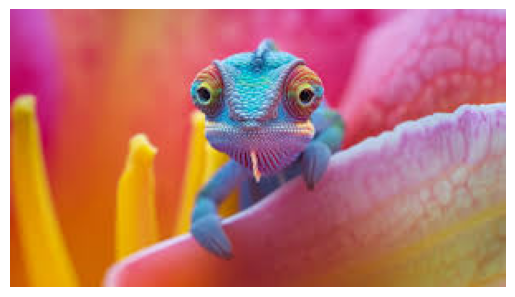

In [4]:
# Read the image
img = cv2.imread('CV-1.jpg')

# Convert BGR to RGB (OpenCV loads images in BGR Format)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image 
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(img.dtype)

uint8


In [7]:
import numpy as np
# adjust numpy's print option to prevent truncation
np.set_printoptions(threshold=np.inf)
print(img)

[[[190  61 162]
  [190  61 162]
  [192  63 164]
  [192  65 168]
  [193  68 172]
  [195  70 174]
  [194  71 177]
  [195  72 178]
  [197  73 183]
  [198  74 184]
  [198  76 185]
  [200  78 187]
  [201  81 189]
  [201  84 191]
  [203  86 193]
  [203  86 193]
  [203  92 187]
  [204  93 188]
  [205  94 188]
  [206  96 183]
  [207  98 177]
  [208 101 169]
  [209 104 161]
  [209 105 156]
  [206  99 141]
  [207  98 137]
  [208  99 130]
  [208  98 123]
  [209  97 119]
  [211  95 116]
  [212  94 116]
  [211  93 117]
  [212 105 115]
  [212 105 113]
  [211 104 112]
  [210 103 109]
  [210 103 109]
  [209 103 107]
  [208 102 106]
  [208 102 104]
  [210  99 106]
  [209 100 106]
  [208  99 105]
  [206 100 104]
  [204 100 101]
  [204 100 101]
  [203 101  99]
  [203 101  99]
  [208 106 101]
  [207 105 100]
  [206 104  99]
  [203 102  94]
  [201 100  90]
  [199  98  88]
  [198  97  85]
  [197  96  84]
  [194  93  81]
  [194  93  81]
  [194  94  79]
  [193  93  78]
  [193  93  77]
  [192  93  74]
  [192  

In [8]:
# Split the image into RGB channel
B , G , R = cv2.split(img)

# Display the individual channels
cv2.imshow("Red Channel", R)
cv2.imshow("Green Channel", G)
cv2.imshow("Blue Channel", B)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# Get the image dimensions
height , width, channels = img.shape
print(f"Resolution:{width} X {height}")

Resolution:300 X 168


In [10]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2.imshow("GrayScale Image", gray_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Access pixel values at (X,y)
x,y = 150, 150
pixel = img[y,x] #in opencv image is accessed as [y,x] {row, column}
print(f'Pixel at ({x},{y}):{pixel}')

Pixel at (150,150):[143  43  51]


In [12]:
# Modify the pixel at (100,150)
img[150,100] = [0, 255, 0]  # Green

# Save the image
cv2.imwrite("CV-1 Modified Image.jpg",img)

True

### **Image Enhancement**
- **Histogram Equalization**

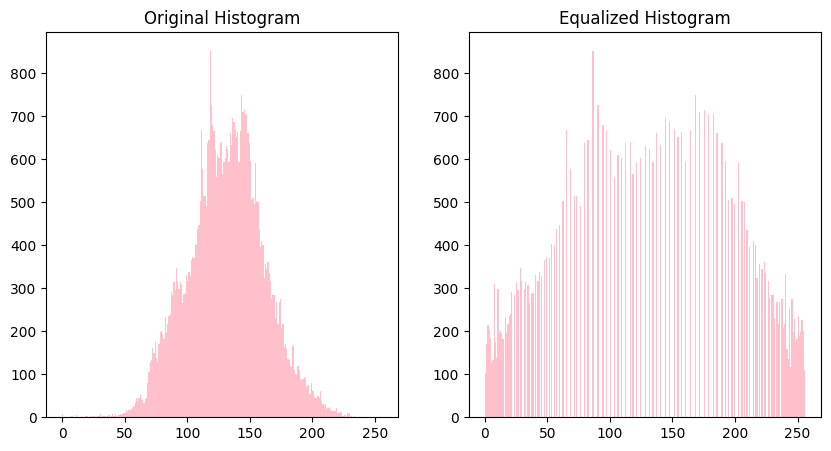

In [13]:
import matplotlib.pyplot as plt
# read the image
image = cv2.imread('CV-1.jpg', cv2.IMREAD_GRAYSCALE)

# check if the image is loaded
if image is None:
    print("Error: Image not found")
else:
    # apply histogram equalization
    equ = cv2.equalizeHist(image)

    # Display the original and equalized image
    cv2.imshow("Original Image", image)
    cv2.imshow("Equalized Image", equ)

   # Plot histogram for comparison
plt.figure(figsize=(10,5))

# plot original image
plt.subplot(1,2,1)
plt.hist(image.ravel(),bins=256, range=[0,256], color='pink')
plt.title("Original Histogram")

# plot equalized image
plt.subplot(1,2,2)
plt.hist(equ.ravel(),bins=256, range=[0,256], color='pink')
plt.title("Equalized Histogram")
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Blurring the image**

In [14]:
# read the image
image = cv2.imread('CV-1.jpg')

# apply gaussian filter
blurred = cv2.GaussianBlur(image, (15,15), 0)

# Display the original and blurred image
cv2.imshow("Original Image", image)
cv2.imshow("Blurred Image", blurred)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Median blur**


In [6]:
# Replace a pixeal value with the median of its neighbouring pixeal. effective for removing salt and paper noise

# Load original image
image = cv2.imread('CV-1.jpg')

# Display the original image
cv2.imshow('Original Image', image)

# Apply the median blurring with a 3X3 kernel
median_blur_3X3 = cv2.medianBlur(image,3)

# Display the median blur with a 3X3 kernel
cv2.imshow('Median Blur(3X3)', median_blur_3X3)

# Apply the median blurring with a 9X9 kernel
median_blur_9X9 = cv2.medianBlur(image,9)

# Display the median blur with a 3X3 kernel
cv2.imshow('Median Blur(9X9)', median_blur_9X9)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Averaging Blur**

In [8]:
# Average pixel values in a kernel , creating a basic blur
# Load the original image
image = cv2.imread('CV2.jpg')

# Apply average blur
blur = cv2.blur(image, (5,5))

# Display the original and blurred image
cv2.imshow("Original Image", image)
cv2.imshow("Averaged Blurred Image", blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Bilateral Blur**

In [4]:
# Gaussian blur + Averaging blur
# Spatial gaussian filter(SGF) : based on distance between pixels
# range gaussian filter(RGF) : based on intensity difference between pixels

# Load the original image
image = cv2.imread('CV-1.jpg')

# Apply bilateral blur
# cv2.bilateralFilter(src,diameter of kernel(3X3),RGF,SGF)
bilateral = cv2.bilateralFilter(image, d=5, sigmaColor=175, sigmaSpace=175)

# Display the original and blurred image
cv2.imshow("Original Image", image)
cv2.imshow("Bilateral Blurred Image", bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()
